In [1]:
# HIDDEN
import warnings
warnings.filterwarnings('ignore')
from datascience import *
from prob140 import *
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy import stats

## The Gamma Family ##

You have seen in exercises that a non-negative random variable $X$ has the *gamma* $(r, \lambda)$ distribution for two positive parameters $r$ and $\lambda$ if the density of $X$ is given by

$$
f_X(x) ~ = ~ \frac{\lambda^r}{\Gamma(r)} x^{r-1}e^{-\lambda x}, ~~~~~ x \ge 0
$$

Here

$$
\Gamma(r) ~ = ~ \int_0^\infty x^{r-1}e^{-x} dx
$$

is the *Gamma* function applied to $r$, and is part of the constant that makes the density integrate to $1$.

As you have shown, the key fact about the Gamma function is the recursion 

$$
\Gamma(r+1) ~ = ~ r\Gamma (r), ~~~~ r > 0
$$

which implies in particular that 

$$
\Gamma(r) ~ = ~ (r-1)! ~~~~ \text{if } r \text{ is a positive integer}
$$

You have put all this together to show that

$$
E(X) ~ = ~ \frac{r}{\lambda} ~~~~~~~~~~~~~~ SD(X) ~ = ~ \frac{\sqrt{r}}{\lambda}
$$

You have observed that the square of a standard normal variable has the gamma $(1/2, 1/2)$ distribution, and that the exponential $(\lambda)$ distribution is the same as the gamma $(1, \lambda)$ distribution.

### The Rate $\lambda$ ###
For fixed $r$, the larger $\lambda$ is, the smaller $X$ is expected to be. Also like the exponential, the parameter $\lambda$ essentially identifies the units of measurement – for a positive constant $c$, the random variable $Y = cX$ has the gamma $(r, \lambda/c)$ distribution. You can see this by applying the linear change of variable formula for densities. For positive $y$, the density of $Y$ is

$$
f_Y(y) ~ = ~ f_X(\frac{y}{c}) \cdot \frac{1}{c} ~ = ~ 
\frac{(\lambda/c)^r}{\Gamma(r)} y^{r-1}e^{-(\lambda/c) y}
$$

`SciPy` calls $1/\lambda$ the "scale" parameter of the gamma distribution. Because the parameter just determines the scale on the horizontal axis of the graph of the density, it is often taken to be 1. That's what we will do to study the other parameter $r$.

```{admonition} Quick Check
Suppose $X$ has the gamma $(2, 3)$ distribution. What is the distribution of $3X$?

```

```{admonition} Answer
:class: dropdown
gamma $(2, 1)$

```

### The Shape Parameter $r$ ###
Here are the graphs of the gamma $(r, 1)$ densities for $r = 1$, $1.5$, and 2.

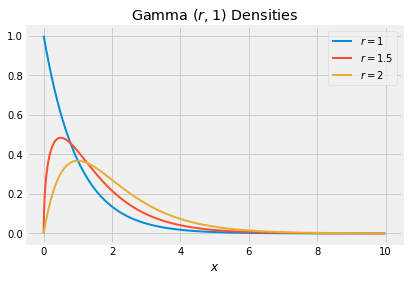

In [2]:
# NO CODE

x = np.arange(0, 10, 0.01)
y1 = stats.gamma.pdf(x, 1, scale=1)
y2 = stats.gamma.pdf(x, 1.5, scale=1)
y3 = stats.gamma.pdf(x, 2, scale=1)
y5 = stats.chi2.pdf(x, 5)
plt.plot(x, y1, lw=2, label='$r = 1$')
plt.plot(x, y2, lw=2, label='$r = 1.5$')
plt.plot(x, y3, lw=2, label='$r = 2$')
plt.legend()
plt.xlabel('$x$')
plt.title('Gamma $(r, 1)$ Densities');

When $r = 1$ the density is exponential. As $r$ gets larger the density moves to the right and flattens out, consistent with the increasing mean $r$ and SD $\sqrt{r}$.

You can see why the gamma family is used for modeling right-skewed distributions. However, when $r = 10$, the gamma density looks almost normal. To see why, we will examine sums of independent gamma variables.

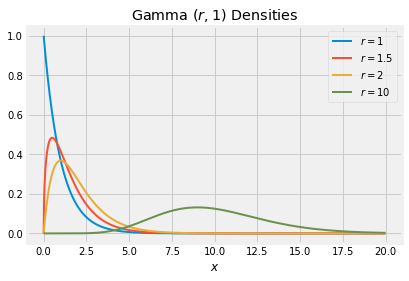

In [3]:
# NO CODE

x = np.arange(0, 20, 0.01)
y1 = stats.gamma.pdf(x, 1, scale=1)
y2 = stats.gamma.pdf(x, 1.5, scale=1)
y3 = stats.gamma.pdf(x, 2, scale=1)
y4 = stats.gamma.pdf(x, 10, scale=1)
plt.plot(x, y1, lw=2, label='$r = 1$')
plt.plot(x, y2, lw=2, label='$r = 1.5$')
plt.plot(x, y3, lw=2, label='$r = 2$')
plt.plot(x, y4, lw=2, label='$r = 10$')
plt.legend()
plt.xlabel('$x$')
plt.title('Gamma $(r, 1)$ Densities');

### Sums of Independent Gamma Variables with the Same Rate ###
**If $X$ has the gamma $(r, \lambda)$ distribution and $Y$ independent of $X$ has the gamma $(s, \lambda)$ distribution, then $X+Y$ has the gamma $(r+s, \lambda)$ distribution.**

Note that for the result to apply, the rate parameter has to be the same for $X$ and $Y$. The rate parameter turns out to be the same for $X+Y$ as well, and the shape parameters add up.

We will prove this result in the next chapter along with the corresponding result for sums of independent normal variables. For now, let's test out the result by simulation just as we did with the sums of normals. The first three lines in the cell below set the values of $\lambda$, $r$, and $s$. The rest simulates 10000 values of $X+Y$ and plots the gamma $(r+s, \lambda)$ density over the simulated values.

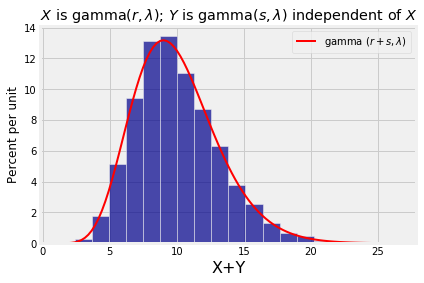

In [4]:
# Change these three parameters as you wish.
lam = 1
r = 3
s = 7

# Leave the rest of the code alone.
x = stats.gamma.rvs(r, scale=1/lam, size=10000)
y = stats.gamma.rvs(s, scale=1/lam, size=10000)
w = x+y
Table().with_column('X+Y', w).hist(bins=20)
t = np.arange(min(w), max(w)+0.1, (max(w) - min(w))/100)
dens = stats.gamma.pdf(t, r+s, scale=1/lam)
plt.plot(t, dens, color='red', lw=2, label='gamma $(r+s, \lambda)$')
plt.legend()
plt.title('$X$ is gamma$(r, \lambda)$; $Y$ is gamma$(s, \lambda)$ independent of $X$');

```{admonition} Quick Check
If $X$ has gamma $(2, 3)$ distribution and $Y$ has gamma $(5, 3)$ distribution independent of $X$, what is the distribution of $X+Y$?

```

```{admonition} Answer
:class: dropdown
gamma $(7, 3)$

```

In [5]:
# VIDEO: Gamma with Integer Shape Parameter
from IPython.display import YouTubeVideo

YouTubeVideo('BQoIs4eWZa4')

### Integer Shape Parameter ###

One of the two most important branches of the gamma family consists of gamma distributions that have an integer as the shape parameter. 

Suppose $T_1, T_2, T_3, \ldots$ are i.i.d. exponential $(\lambda)$ variables. Then each of them has the gamma $(1, \lambda)$ distribution. These are the fundamental members of the "integer shape parameter" branch.

By the fact we observed about sums of independent gamma variables, for all integers $r$ the sum $S_r = T_1 + T_2 + \cdots + T_r$ has the gamma $(r, \lambda)$ distribution. These are the other members of the branch. 

You can now see why the gamma $(r, \lambda)$ distribution is approximately normal for large $r$. For integer $r$, the sum of $r$ i.i.d. exponential $(\lambda)$ random variables has the gamma $(r, \lambda)$ distribution. For fixed $\lambda$ and large $r$, the Central Limit Theorem says the distribution of the sum is approximately normal. 

Gamma distributions with integer shape parameter are a fundamental part of a stochastic process called a *Poisson process* which you will examine in exercises.

The other important branch of the gamma family is the topic of the next section.